<a href="https://colab.research.google.com/github/meenamahanth/DataScience/blob/main/Car_Price_Preciction/Car_Price_Full_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Car Price Prediction

Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings  # To check the errors
warnings.filterwarnings('ignore')
%matplotlib inline

Add the cardata.csv in the files tab you can get it from the below link

In [2]:
df = pd.read_csv('cardata.csv') # https://github.com/meenamahanth/DataScience/blob/main/Car_Price_Preciction/cardata.csv

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


To get the numerical columns

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Checking the null values of each column

In [8]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [9]:
df.isna().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


Feature Engineering

Adding new column to get the difference between present year and year in the row to know how old the car is

In [10]:
df['years_diff'] = 2025 - df['Year']

In [11]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,years_diff
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


In [12]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'years_diff'],
      dtype='object')

Plotting for Non-numerical columns

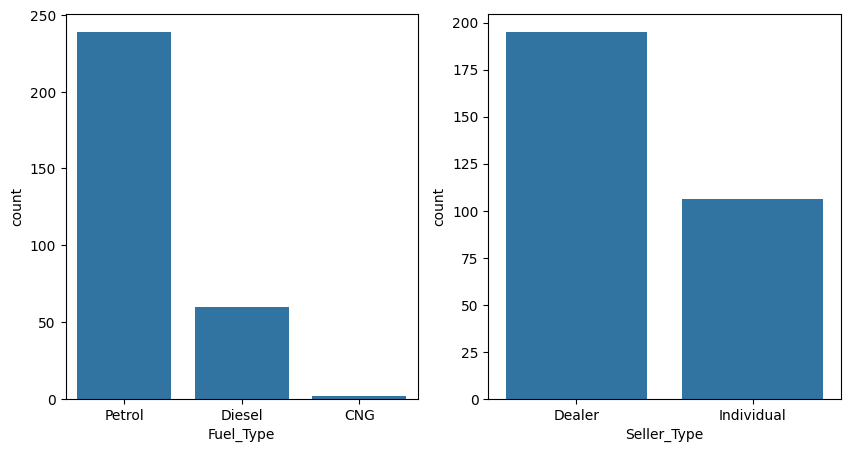

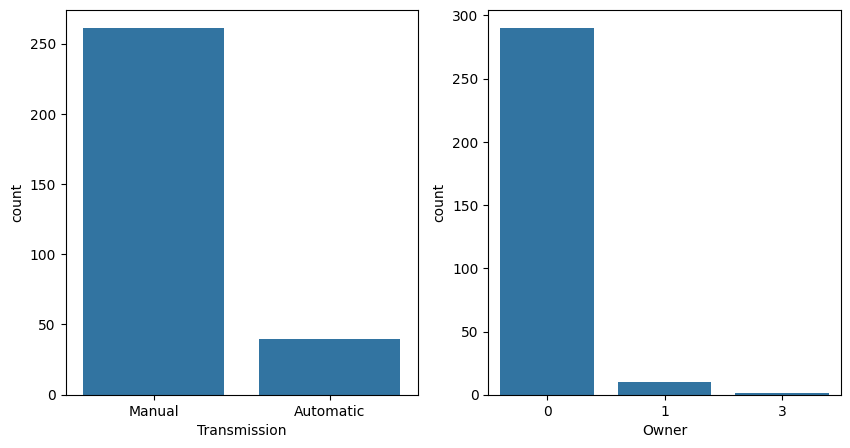

In [13]:
categorical_cols = ['Fuel_Type', 'Seller_Type', 'Transmission','Owner']
i=0
while i< len(categorical_cols):
    fig = plt.figure(figsize= (10,5))
    plt.subplot(1,2,1) # as we taken 5 columns divide the number upto 5
    sns.countplot(x = categorical_cols[i], data = df)
    i+=1
    plt.subplot(1,2,2)
    sns.countplot(x = categorical_cols[i], data = df)
    i+=1
    plt.show()

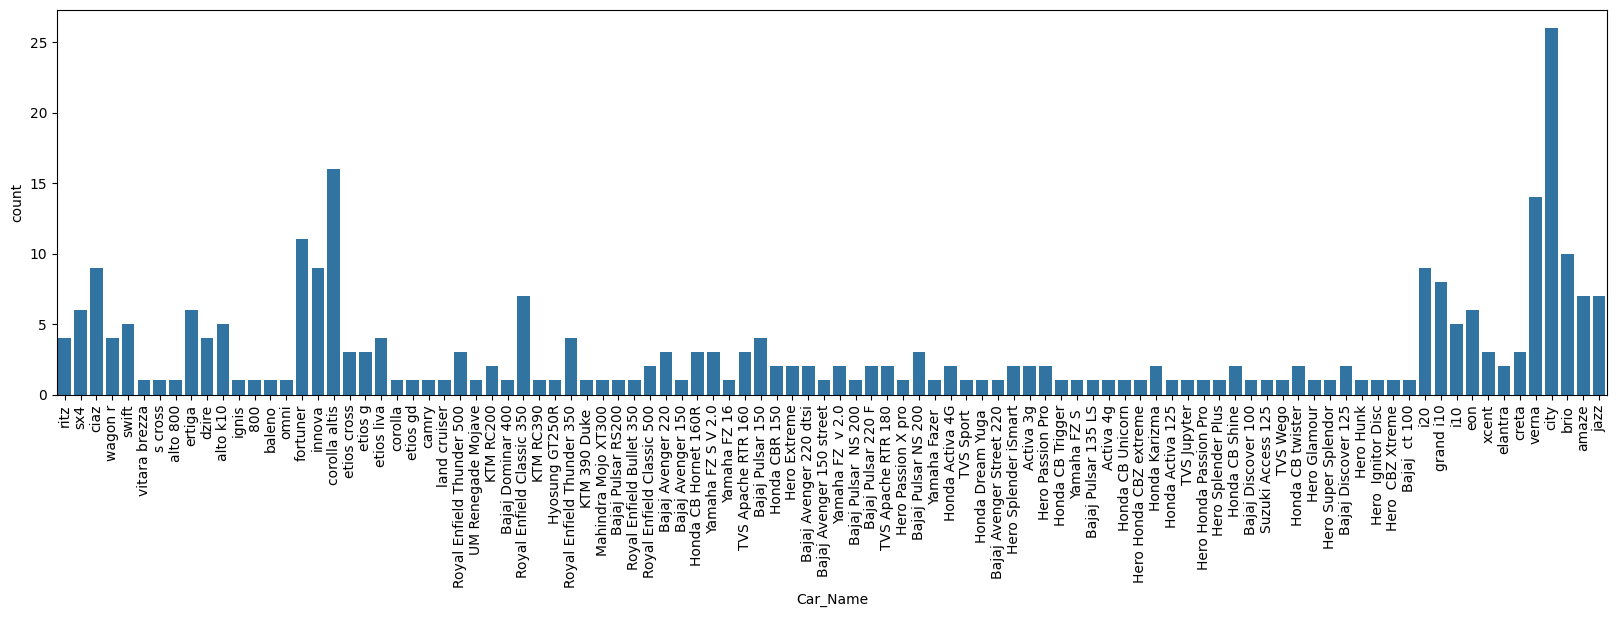

In [14]:
fig = plt.figure(figsize=(20,5))
ax = sns.countplot(x='Car_Name',data=df)
ax.tick_params(axis='x', rotation=90)
plt.show()

Plotting for numerical columns

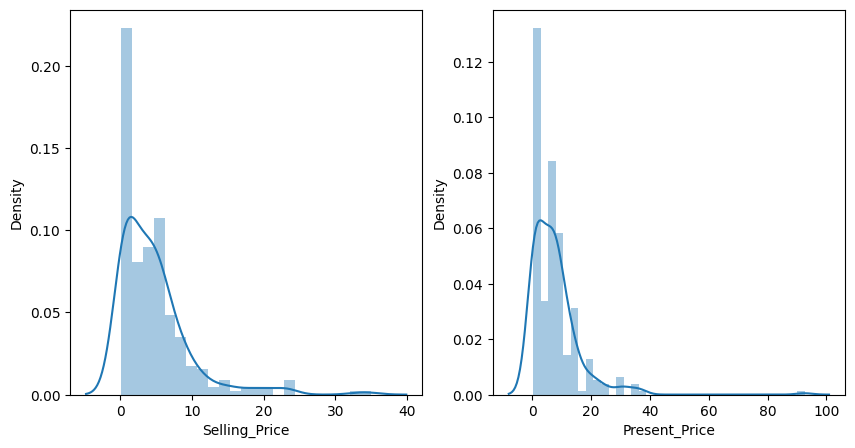

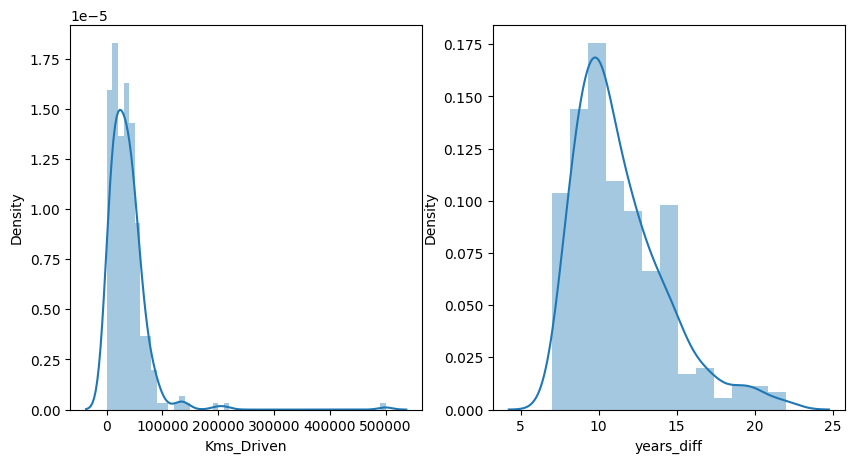

In [15]:
# Distribution plot
numerical_cols = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'years_diff']
i = 0
while i < len(numerical_cols):
    fig = plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.distplot(df[numerical_cols[i]])
    i+=1
    plt.subplot(1, 2, 2)
    sns.distplot(df[numerical_cols[i]])
    i+=1
    plt.show()

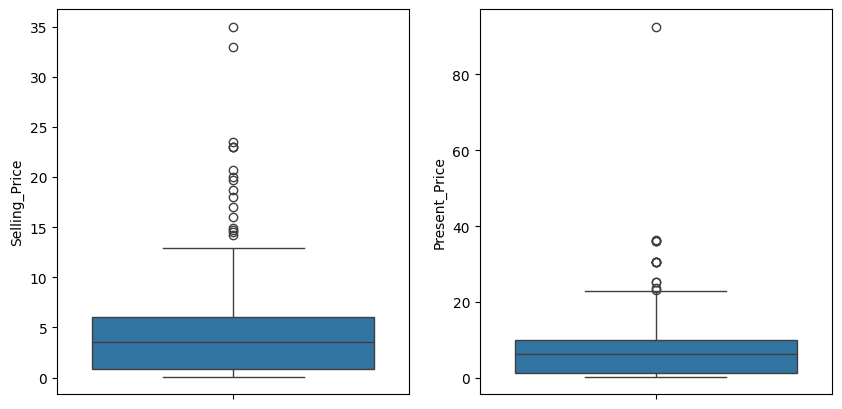

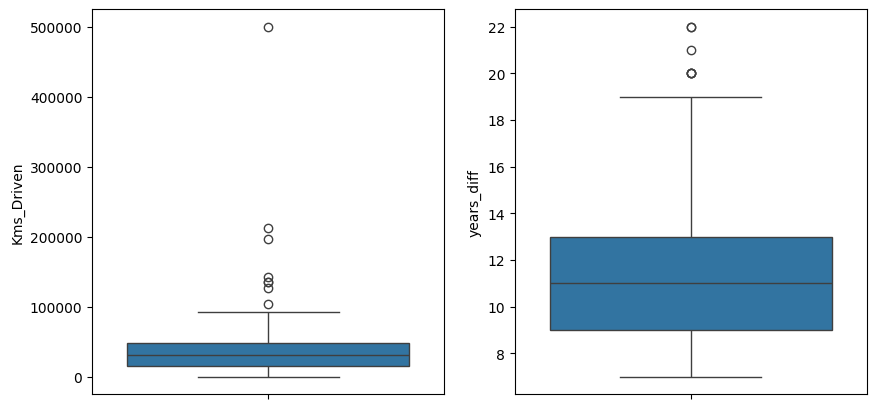

In [16]:
# Box plot - it's checks for the most frequent values
numerical_cols = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'years_diff']
i = 0
while i < len(numerical_cols):
    fig = plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.boxplot(df[numerical_cols[i]])
    i+=1
    plt.subplot(1, 2, 2)
    sns.boxplot(df[numerical_cols[i]])
    i+=1
    plt.show()

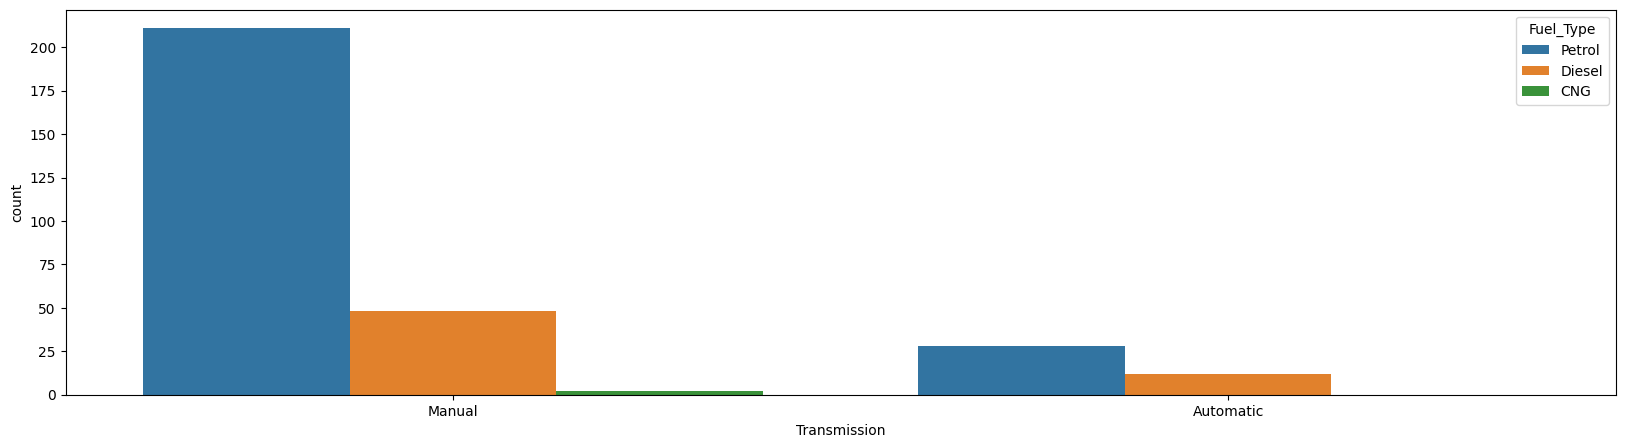

In [17]:
fig = plt.figure(figsize=(20,5))
sns.countplot(x='Transmission',data=df,hue='Fuel_Type')  # To get the color use hue
plt.show()

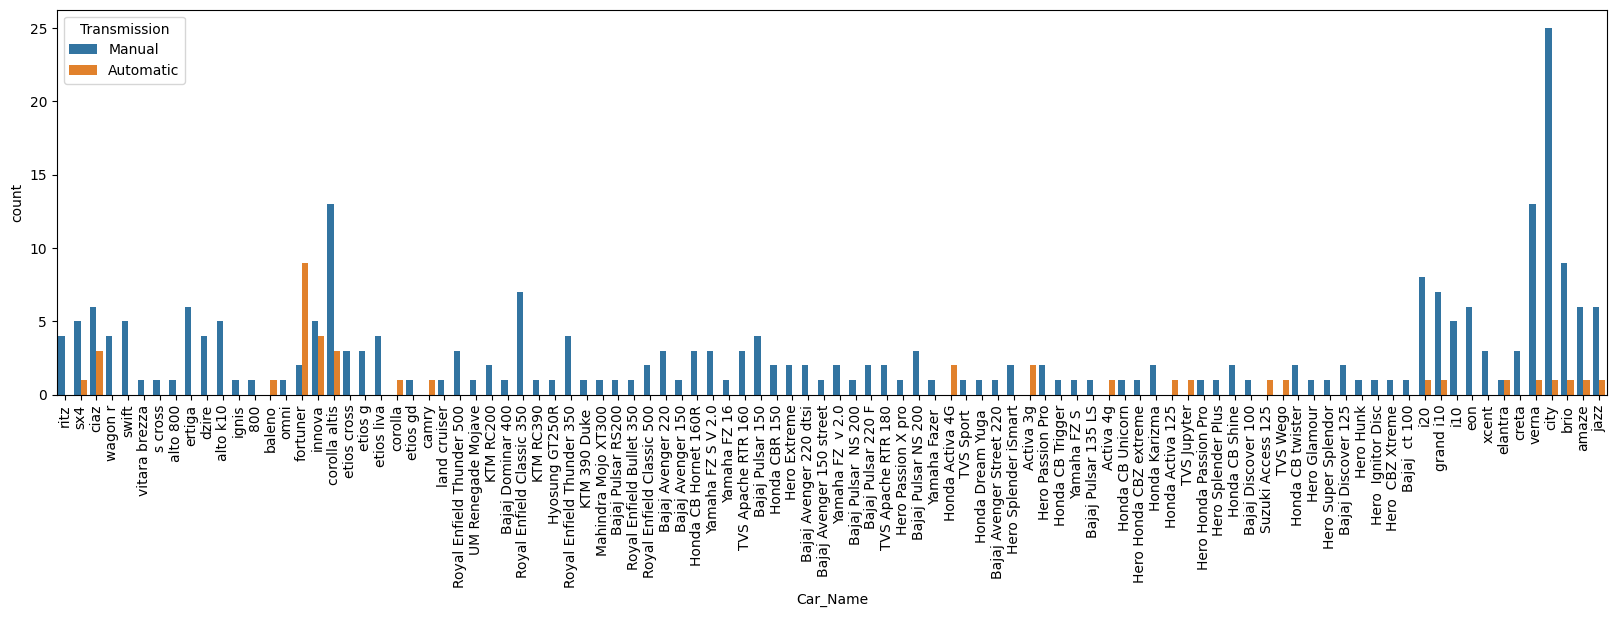

In [18]:
fig = plt.figure(figsize=(20,5))
ax = sns.countplot(x='Car_Name',data=df, hue="Transmission")
ax.tick_params(axis='x', rotation=90)
plt.show()

Univariant analysis

In [19]:
# This shows cars whose price is higher than 99% of all other cars.
# These are very expensive cars.
df[df['Present_Price']>df['Present_Price'].quantile(0.99)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,years_diff
64,fortuner,2017,33.0,36.23,6000,Diesel,Dealer,Automatic,0,8
86,land cruiser,2010,35.0,92.60,78000,Diesel,Dealer,Manual,0,15


In [20]:
df[df['Selling_Price']>df['Selling_Price'].quantile(0.99)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,years_diff
63,fortuner,2015,23.5,35.96,47000,Diesel,Dealer,Automatic,0,10
64,fortuner,2017,33.0,36.23,6000,Diesel,Dealer,Automatic,0,8
86,land cruiser,2010,35.0,92.60,78000,Diesel,Dealer,Manual,0,15


In [21]:
df[df['Kms_Driven']>df['Kms_Driven'].quantile(0.99)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,years_diff
84,innova,2005,3.49,13.46,197176,Diesel,Dealer,Manual,0,20
179,Honda Karizma,2010,0.31,1.05,213000,Petrol,Individual,Manual,0,15
196,Activa 3g,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0,17


<Axes: >

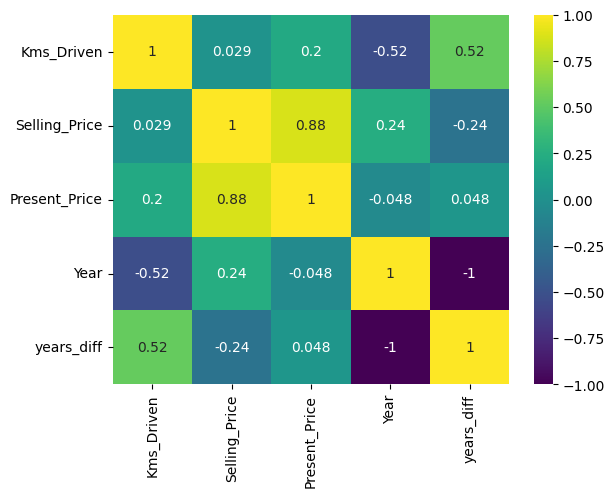

In [22]:
# Heat Map plotting
df1 = df[['Kms_Driven','Selling_Price','Present_Price','Year','years_diff']]
sns.heatmap(df1.corr(), annot=True , cmap='viridis')

In [23]:
df1.corr()['Selling_Price']

,Selling_Price
Kms_Driven,0.029187
Selling_Price,1.000000
Present_Price,0.878983
Year,0.236141
years_diff,-0.236141


In [24]:
df1.corr()['Present_Price']

,Present_Price
Kms_Driven,0.203647
Selling_Price,0.878983
Present_Price,1.000000
Year,-0.047584
years_diff,0.047584


In [25]:
df1.pivot_table(values='Selling_Price',index='Present_Price',aggfunc='mean')

,Selling_Price
Present_Price,
0.32,0.180000
0.47,0.270000
0.48,0.300000
0.51,0.340000
0.52,0.312500
...,...
25.39,21.875000
30.61,18.280000
35.96,20.746667


We group the data:

Find average selling price for each seller type and fuel type

In [26]:
df.pivot_table(values='Selling_Price',index='Seller_Type',columns='Fuel_Type')  # aggfunc='mean' is a default parameter

Fuel_Type,CNG,Diesel,Petrol
Seller_Type,,,
Dealer,3.1,10.181525,5.252388
Individual,NaN,16.000000,0.726857


In [27]:
df.pivot_table(values='Present_Price',index='Transmission',columns='Fuel_Type',aggfunc='mean')

Fuel_Type,CNG,Diesel,Petrol
Transmission,,,
Automatic,NaN,30.6425,8.746786
Manual,6.415,12.1075,5.163791


Converting all the columns to the numerical values

In [28]:
df2 = df[['Year','Selling_Price','Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner','years_diff']]

In [29]:
df2.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,years_diff
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


In [30]:
df2['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [31]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [32]:
df2['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [33]:
df2['Owner'].unique()

array([0, 1, 3])

In [34]:
df2 = pd.get_dummies(df2, drop_first=True)

In [35]:
df2.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,years_diff,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,11,False,True,False,True
1,2013,4.75,9.54,43000,0,12,True,False,False,True
2,2017,7.25,9.85,6900,0,8,False,True,False,True
3,2011,2.85,4.15,5200,0,14,False,True,False,True
4,2014,4.60,6.87,42450,0,11,True,False,False,True


As we can’t give words to a machine. So we turn Petrol, Diesel, Manual, etc. into 0s and 1s.

In [36]:
# Mapping False and True with 0 and 1 for the entire dataset
df2 = df2.applymap(lambda x : 1 if x == True else x)
df2 = df2.applymap(lambda x : 0 if x == False else x)

In [37]:
df2.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,years_diff,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,11,0,1,0,1
1,2013,4.75,9.54,43000,0,12,1,0,0,1
2,2017,7.25,9.85,6900,0,8,0,1,0,1
3,2011,2.85,4.15,5200,0,14,0,1,0,1
4,2014,4.60,6.87,42450,0,11,1,0,0,1


In [38]:
df2.head(20)  # at 18 row the Fuel_Type_Diesel and Fuel_Type_Petrol is 0 i.e it's CNG there

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,years_diff,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,11,0,1,0,1
1,2013,4.75,9.54,43000,0,12,1,0,0,1
2,2017,7.25,9.85,6900,0,8,0,1,0,1
3,2011,2.85,4.15,5200,0,14,0,1,0,1
4,2014,4.60,6.87,42450,0,11,1,0,0,1
5,2018,9.25,9.83,2071,0,7,1,0,0,1
6,2015,6.75,8.12,18796,0,10,0,1,0,1
7,2015,6.50,8.61,33429,0,10,1,0,0,1
8,2016,8.75,8.89,20273,0,9,1,0,0,1
9,2015,7.45,8.92,42367,0,10,1,0,0,1


Predicting the Price

In [39]:
y = df2['Selling_Price']
x = df2.drop(columns='Selling_Price')

In [40]:
df2.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,years_diff,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,11,0,1,0,1
1,2013,4.75,9.54,43000,0,12,1,0,0,1
2,2017,7.25,9.85,6900,0,8,0,1,0,1
3,2011,2.85,4.15,5200,0,14,0,1,0,1
4,2014,4.60,6.87,42450,0,11,1,0,0,1


In [41]:
x.shape

(301, 9)

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)  # 15 percent means 45.16 so test size is 46

In [43]:
print("x_train shape :", x_train.shape)
print("x_test shape :", x_test.shape)
print("y_train shape :", y_train.shape)
print("y_test shape :", y_test.shape)

x_train shape : (255, 9)
x_test shape : (46, 9)
y_train shape : (255,)
y_test shape : (46,)


In [44]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [45]:
all = []  # writing all =[] outside the function , because we are able to compare the Linear, Ridge and Lasso Regression

def car_price_pred_model(model, model_name):

    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    all.append(r2_train)
    all.append(r2_test)
    # Call the .mean() method to get the mean value before rounding
    cross_val = cross_val_score(model, x_train, y_train, cv=5).mean()
    all.append(round(cross_val,2))
    mae_train = mean_absolute_error(y_train, y_pred_train)
    all.append(round(mae_train,2))
    mae_test = mean_absolute_error(y_test, y_pred_test)
    all.append(round(mae_test,2))
    mse_train = mean_squared_error(y_train, y_pred_train)
    all.append(round(mse_train,2))
    mse_test = mean_squared_error(y_test, y_pred_test)
    all.append(round(mse_test,2))
    fig, ax = plt.subplots(1,2,figsize=(10,4))
    ax[0].set_title('Residual plot for training data')
    sns.distplot(y_train - y_pred_train, ax=ax[0])
    ax[0].set_xlabel('y_train-y-pred_train')
    ax[1].set_title('Residual plot for testing data')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    plt.show()
    return all

Linear Regression

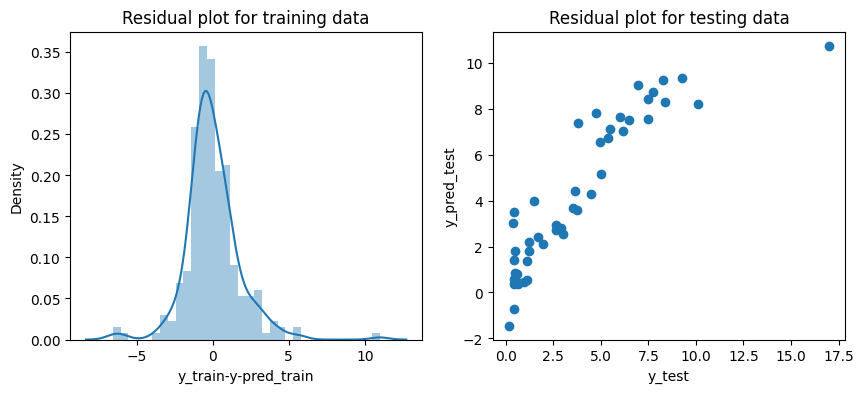

[0.8885407883280819,
 0.7874168534980448,
 np.float64(0.85),
 1.21,
 1.06,
 3.13,
 2.55]

In [46]:
# starting with standard linear regression
lr = LinearRegression()
car_price_pred_model(lr,'Linear Regression')

In [47]:
# coefficients of the linear model
lr.coef_

array([ 1.87036273e-01,  4.31593986e-01, -6.82588662e-06, -8.56898637e-01,
       -1.87036273e-01,  2.64434174e+00,  6.58317034e-01, -1.12852529e+00,
       -1.66576069e+00])

Ridge Regression - it reduces the overfitting of the data and to reduce multi-collinear it's also called as L2 regression technique - penality = sum of the square of the coefficient

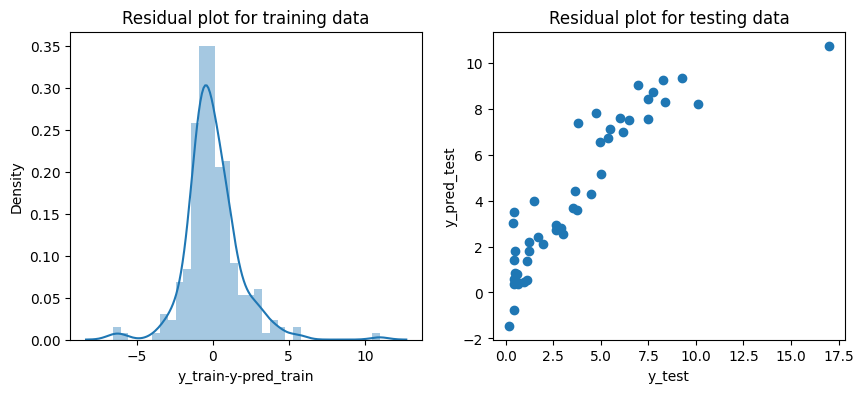

[0.8885407883280819,
 0.7874168534980448,
 np.float64(0.85),
 1.21,
 1.06,
 3.13,
 2.55,
 0.888540325669151,
 0.7875206947546847,
 np.float64(0.85),
 1.21,
 1.06,
 3.13,
 2.55]

In [48]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

rg = Ridge()
alpha = np.logspace(-3,3, num =14)
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha = alpha))
car_price_pred_model(rg_rs,"ridge.pkl")

Lasso Regression it's also called as L1 reguralization it's purpose is to get the predictors almost equal to the actual values adding a penality term to reduce or increase the efficient of the prediction model - penality = sum of the coefficent

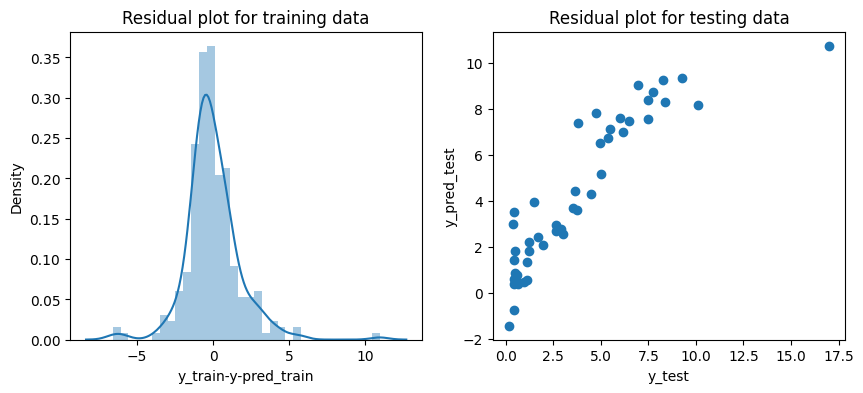

[0.8885407883280819,
 0.7874168534980448,
 np.float64(0.85),
 1.21,
 1.06,
 3.13,
 2.55,
 0.888540325669151,
 0.7875206947546847,
 np.float64(0.85),
 1.21,
 1.06,
 3.13,
 2.55,
 0.8885209102363989,
 0.7880702883786344,
 np.float64(0.84),
 1.22,
 1.06,
 3.13,
 2.54]

In [49]:
# lasso regression
from sklearn.linear_model import Lasso
ls = Lasso()
alpha = np.logspace(-3,3, num =14)
ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha = alpha))
car_price_pred_model(ls_rs,"lasso.pkl")

Random Forest Regression - it's a tree like structure it's used only for numerical variables It's checks for the mostly frequent variable and it checks the hierachy of the data

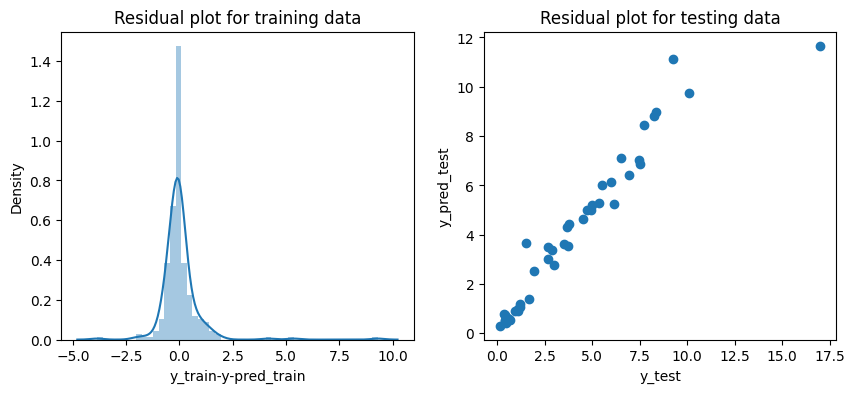

[0.8885407883280819,
 0.7874168534980448,
 np.float64(0.85),
 1.21,
 1.06,
 3.13,
 2.55,
 0.888540325669151,
 0.7875206947546847,
 np.float64(0.85),
 1.21,
 1.06,
 3.13,
 2.55,
 0.8885209102363989,
 0.7880702883786344,
 np.float64(0.84),
 1.22,
 1.06,
 3.13,
 2.54,
 0.9691698413716666,
 0.9215981298006274,
 np.float64(0.85),
 0.45,
 0.49,
 0.87,
 0.94]

In [50]:
# Random Forest regression technique
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

n_estimators = list(range(500,1000,100))
max_depth = list(range(4,9,4))
min_samples_split = list(range(4,9,2))
min_samples_leaf = [1,2,5,7]
max_features = ['auto','sqrt']
param_grid = {
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'max_features':max_features
}
rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)
car_price_pred_model(rf_rs,"random_forest.pkl")

In [51]:
print(rf_rs.best_estimator_)

RandomForestRegressor(max_depth=8, max_features='sqrt', min_samples_split=4,
                      n_estimators=600)


Gradient Boosting - it's the next upgraded version of Random Forest

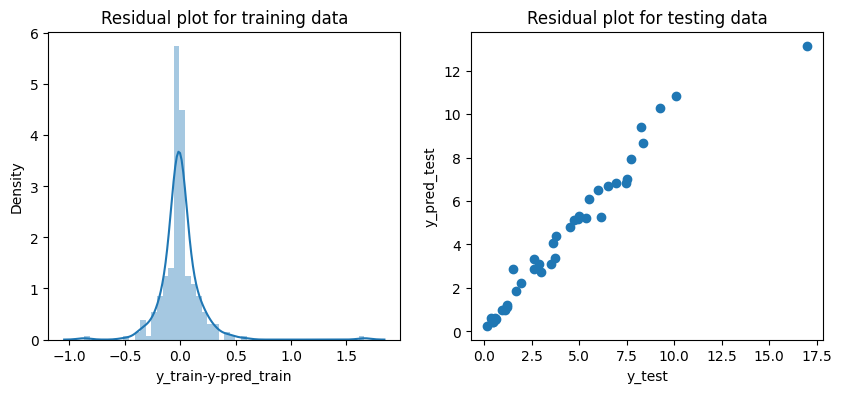

[0.8885407883280819,
 0.7874168534980448,
 np.float64(0.85),
 1.21,
 1.06,
 3.13,
 2.55,
 0.888540325669151,
 0.7875206947546847,
 np.float64(0.85),
 1.21,
 1.06,
 3.13,
 2.55,
 0.8885209102363989,
 0.7880702883786344,
 np.float64(0.84),
 1.22,
 1.06,
 3.13,
 2.54,
 0.9691698413716666,
 0.9215981298006274,
 np.float64(0.85),
 0.45,
 0.49,
 0.87,
 0.94,
 0.9988132558234685,
 0.9565812259709109,
 np.float64(0.88),
 0.1,
 0.4,
 0.03,
 0.52]

In [52]:
# Gradient boosting technique
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

# Instantiate the GradientBoostingRegressor class
gb = GradientBoostingRegressor()

learning_rate = [0.001,0.01,0.1,0.2]
n_estimators = list(range(500,1000,100))
max_depth = list(range(4,9,4))
min_samples_split = list(range(4,9,2))
min_samples_leaf = [1,2,5,7]
max_features = ['auto','sqrt']
param_grid = {
    'learning_rate':learning_rate,
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'max_features':max_features
}
gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)
car_price_pred_model(gb_rs,"gradient_boosting.pkl")